# Baseline Models 

We can compare to baseline weather prediction models. A persistence baseline is one where tomorrow's prediction is today's weather. A climatology forecast baseline averages historical data for a prediction that matches the climate of the region, but pays no attention to the dynamism of day to day weather. 

We create forecasts using different baseline models.

In [1]:
# !pip install xarray==0.19.0
# !pip install climetlab
# !pip install climetlab_weatherbench
# !pip install numexpr=='2.7.3'

In [2]:
import xarray as xr
import climetlab as cml
import numpy as np
from utils import *

In [3]:
# Load Data
us_temp_data = xr.open_mfdataset('data/us_temperature.nc')
us_rain_data = xr.open_mfdataset('data/us_precipitation.nc')

In [4]:
# Normalize datasets
us_temp_data = normalize(us_temp_data).t2m
us_rain_data = normalize(us_rain_data).tp

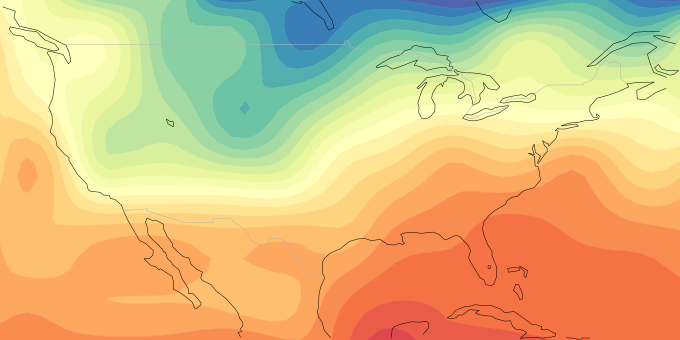

In [5]:
plot_temp(us_temp_data[-1])

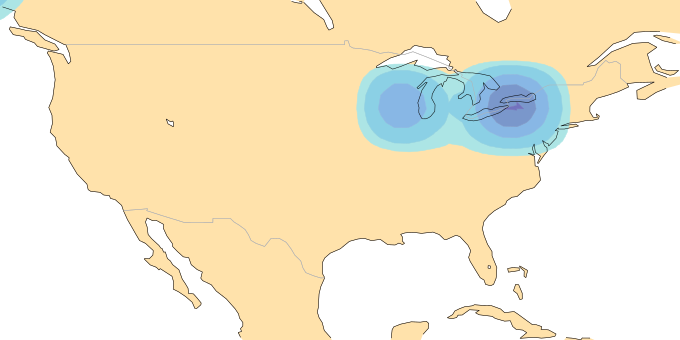

In [6]:
plot_rain(us_rain_data[-1])

## Persistence Model
This simplistic way of forecasting, where usually what is done is persisting previous weather conditions as forecast. However, as this doesn't make much sense based on how weather works, we instead persist the hourly changes from the past. 

In [7]:
# Create persistence forecast
def persistence_forecast(data, lead_time):
    forecasts = []
    curr = data[-1]

    diffs = data[-1*lead_time:].diff('time', 1)
    for d in diffs:
        curr += d
        forecasts.append(curr)
        
    pred_times = np.array([data.time[-1].values + i*36*10**11 for i in range(1, len(forecasts) + 1)])
    pred_times = xr.DataArray(pred_times, dims=['time'], coords={'time': pred_times}, name='time')

    forecasts = xr.concat(forecasts, pred_times)
    return normalize(forecasts)

In [8]:
temp_preds = persistence_forecast(us_temp_data, 31*24)
rain_preds = persistence_forecast(us_rain_data, 31*24)

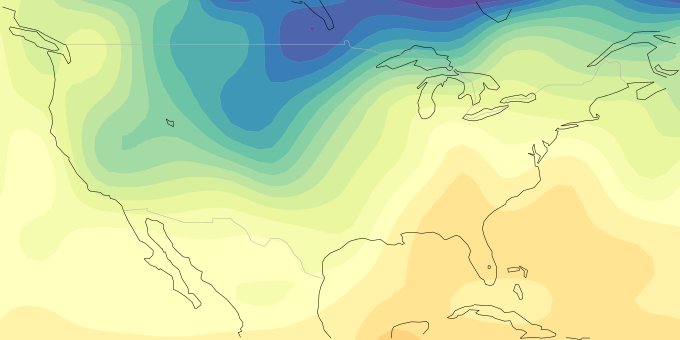

In [9]:
plot_temp(temp_preds[0])

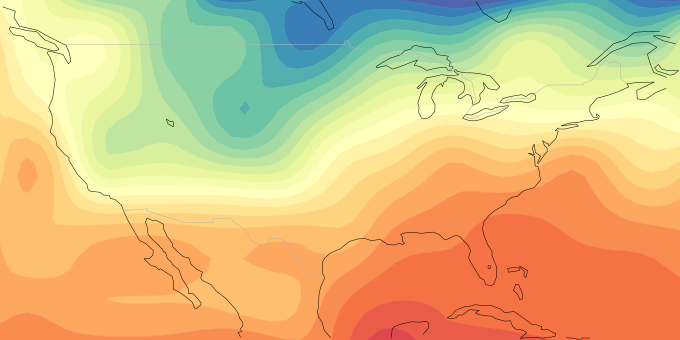

In [10]:
plot_temp(us_temp_data[-1])

## Climatology Models


In [ ]:
# TODO: Create Overall Climatology and visualize


In [ ]:
# TODO: Create Weekly Climatology and visualize


# Linear Regression Model

In [ ]:
# TODO: Load Training and Testing data


In [ ]:
# TODO: Setup and Train Linear Regression Model 


## Forecasting: 3 Days Direct


In [ ]:
# TODO: Train model to predict for 3 days lead time


## Forecasting: 5 Days Direct


In [ ]:
# TODO: Train model to predict for 5 days lead time


## Forecasting: 5 Days Iterative 


In [ ]:
# TODO: Train model to predict for 6 hours lead time


In [ ]:
# TODO: Use 6 hour model to predict for 5 days. 
